<a href="https://colab.research.google.com/github/l2onnie/cop4630/blob/master/hw2/Hw2_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Homework 2 Part 2

In [0]:
#import libraries
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
# generate m random pairs (x, y)

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)

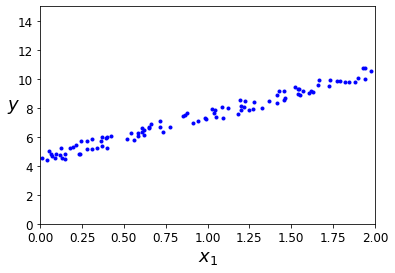

In [0]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [0]:
#Bias and weights

# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X])

# create array with x1=0 and x1=2
X_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((2, 1)), X_new])

In [0]:

# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(2, 1)

In [0]:
weight = initial_weight

for epoch in range(epochs):
    gradient = 1/m * X_b.T.dot(X_b.dot(weight) - y)
    weight = weight - lr * gradient
y_predict = X_new_b.dot(weight)
y_predict

array([[1.6452141 ],
       [3.84471108]])

In [0]:
def plot_gradient_descent(weight, lr, weight_path=None):
    # plot training data
    plt.plot(X, y, "b.")
    # plot initial prediction
    y_predict = X_new_b.dot(weight)
    plt.plot(X_new, y_predict, "r--")
    
    if weight_path is not None:
      weight_path.append(weight)

    for epoch in range(epochs):
        gradient = 1 / m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - lr * gradient
        if weight_path is not None:
            weight_path.append(weight)
        # plot prediction after weight update
        y_predict = X_new_b.dot(weight)
        plt.plot(X_new, y_predict, "b-")
        
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("lr {}".format(lr), fontsize=16)

In [0]:
weight = initial_weight
weight2 = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight2 = weight2 - lr * gradient
        weight_path_mgd.append(weight)
        weight_path_mgd.append(weight2)
weight_path_mgd[-1]
weight_path_mgd = np.array(weight_path_mgd)

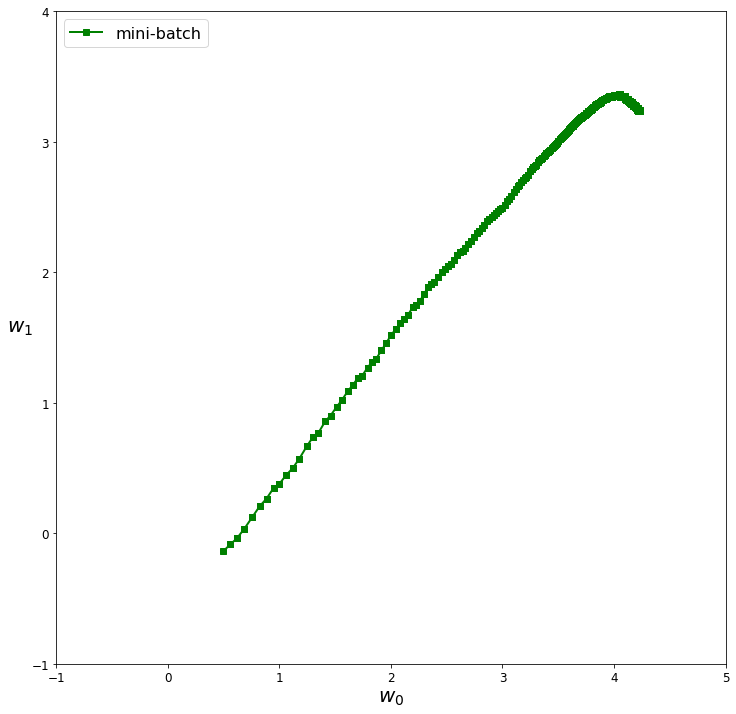

In [0]:
plt.figure(figsize=(12,12))
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([-1, 5, -1, 4])
plt.show()

Sources:

https://github.com/schneider128k/machine_learning_course/blob/master/linear_regression_gradient_descent.ipynb